<a href="https://colab.research.google.com/github/emailmenojunk/datascience/blob/main/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load parquet file into a Pandas DataFrame
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')


In [4]:
# Display the first few rows of the dataset
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [5]:
# Display the shape of the dataset
df.shape


(2463931, 19)

In [6]:
# Check for missing values Which column has null values and how many null values are present
df.isnull().sum()



,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,71503
trip_distance,0
RatecodeID,71503
store_and_fwd_flag,71503
PULocationID,0
DOLocationID,0
payment_type,0


In [7]:
# Summary statistics of the dataset
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


In [8]:
# Drop rows with missing values and store the result
df = df.dropna()
df.shape

(2392428, 19)

In [9]:
# Create a new column for trip duration in minutes
print(df[['tpep_dropoff_datetime', 'tpep_pickup_datetime']].dtypes)
print(df['tpep_dropoff_datetime'].isnull().sum())
print(df['tpep_pickup_datetime'].isnull().sum())
print(df.columns)
print(pd.__version__)
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
print(df.columns)

tpep_dropoff_datetime    datetime64[us]
tpep_pickup_datetime     datetime64[us]
dtype: object
0
0
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')
2.2.2
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_duration'],
      dtype='object')


/tmp/ipython-input-9-1996200565.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [10]:
# Create new columns for pickup hour and day of week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
print(df.columns)
print(df['pickup_day_of_week'].unique())
# Define a mapping dictionary
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
# Apply the mapping to get day names
df['pickup_day_name'] = df['pickup_day_of_week'].map(day_mapping)

# Get unique day names
distinct_day_names = df['pickup_day_name'].unique()

print(distinct_day_names)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_duration',
       'pickup_hour', 'pickup_day_of_week'],
      dtype='object')
[5 4 6 2 0 1 3]
['Saturday' 'Friday' 'Sunday' 'Wednesday' 'Monday' 'Tuesday' 'Thursday']


Text(0.5, 0, 'Pickup Hour')

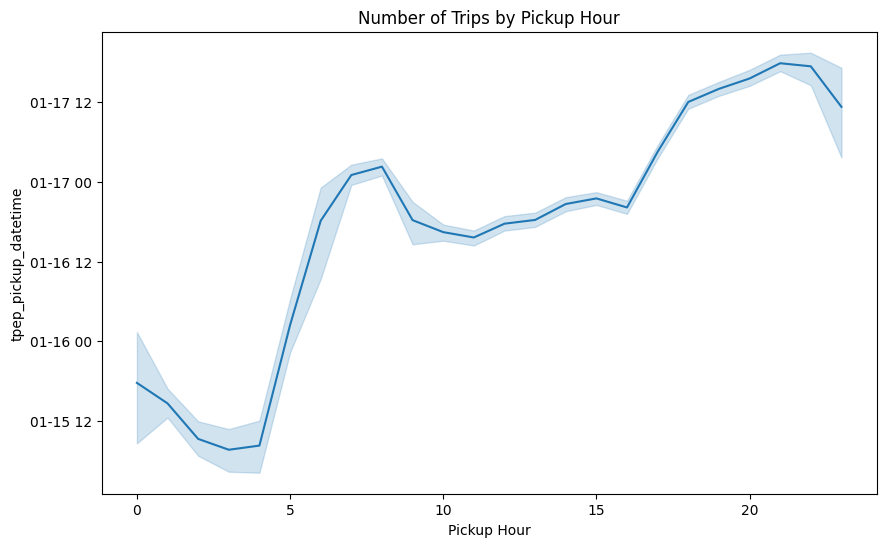

In [11]:
# Create a lineplot displaying the number of trips by pickup hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='tpep_pickup_datetime', data=df)
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Hour')


Text(0.5, 1.0, 'Number of Trips by Pickup Day of Week')

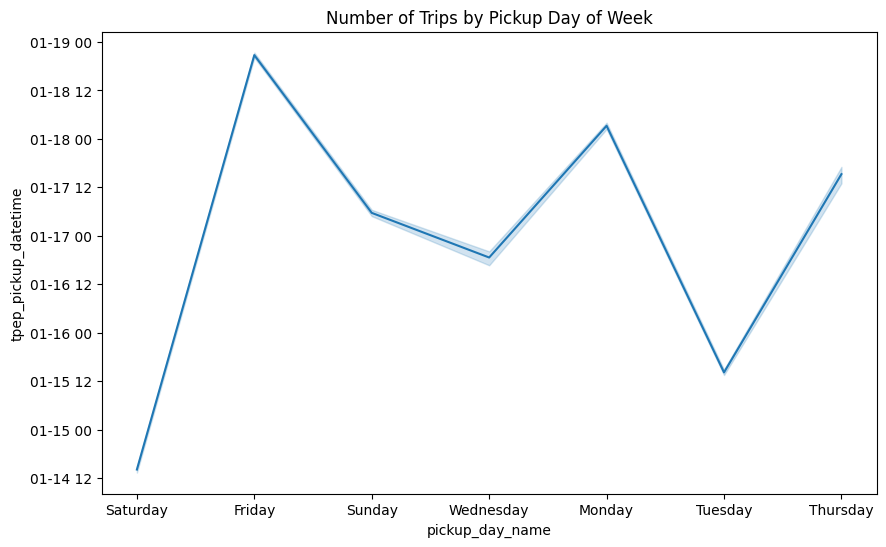

In [12]:
#Create a lineplot displaying the number of trips by pickup day
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_day_name', y='tpep_pickup_datetime', data=df)
plt.title('Number of Trips by Pickup Day of Week')

In [13]:
# Compute correlation matrix of numerical variables
#print data type of all columns
print(df.dtypes)

# exclude non numeric columns from data frame
columns_to_exclude = ['store_and_fwd_flag', 'pickup_day_name']

# df holds only numeric columns
numeric_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Compute correlation matrix of numerical variables
corr_matrix = numeric_df.corr()


VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
trip_duration                   float64
pickup_hour                       int32
pickup_day_of_week                int32
pickup_day_name                  object
dtype: object


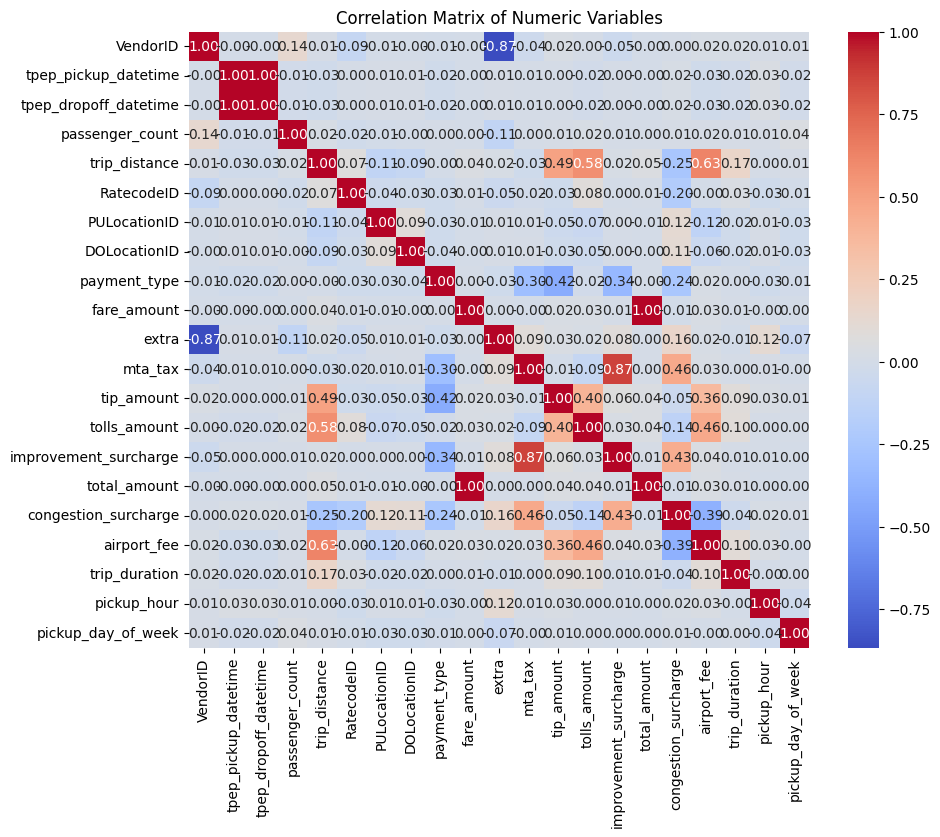

In [14]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

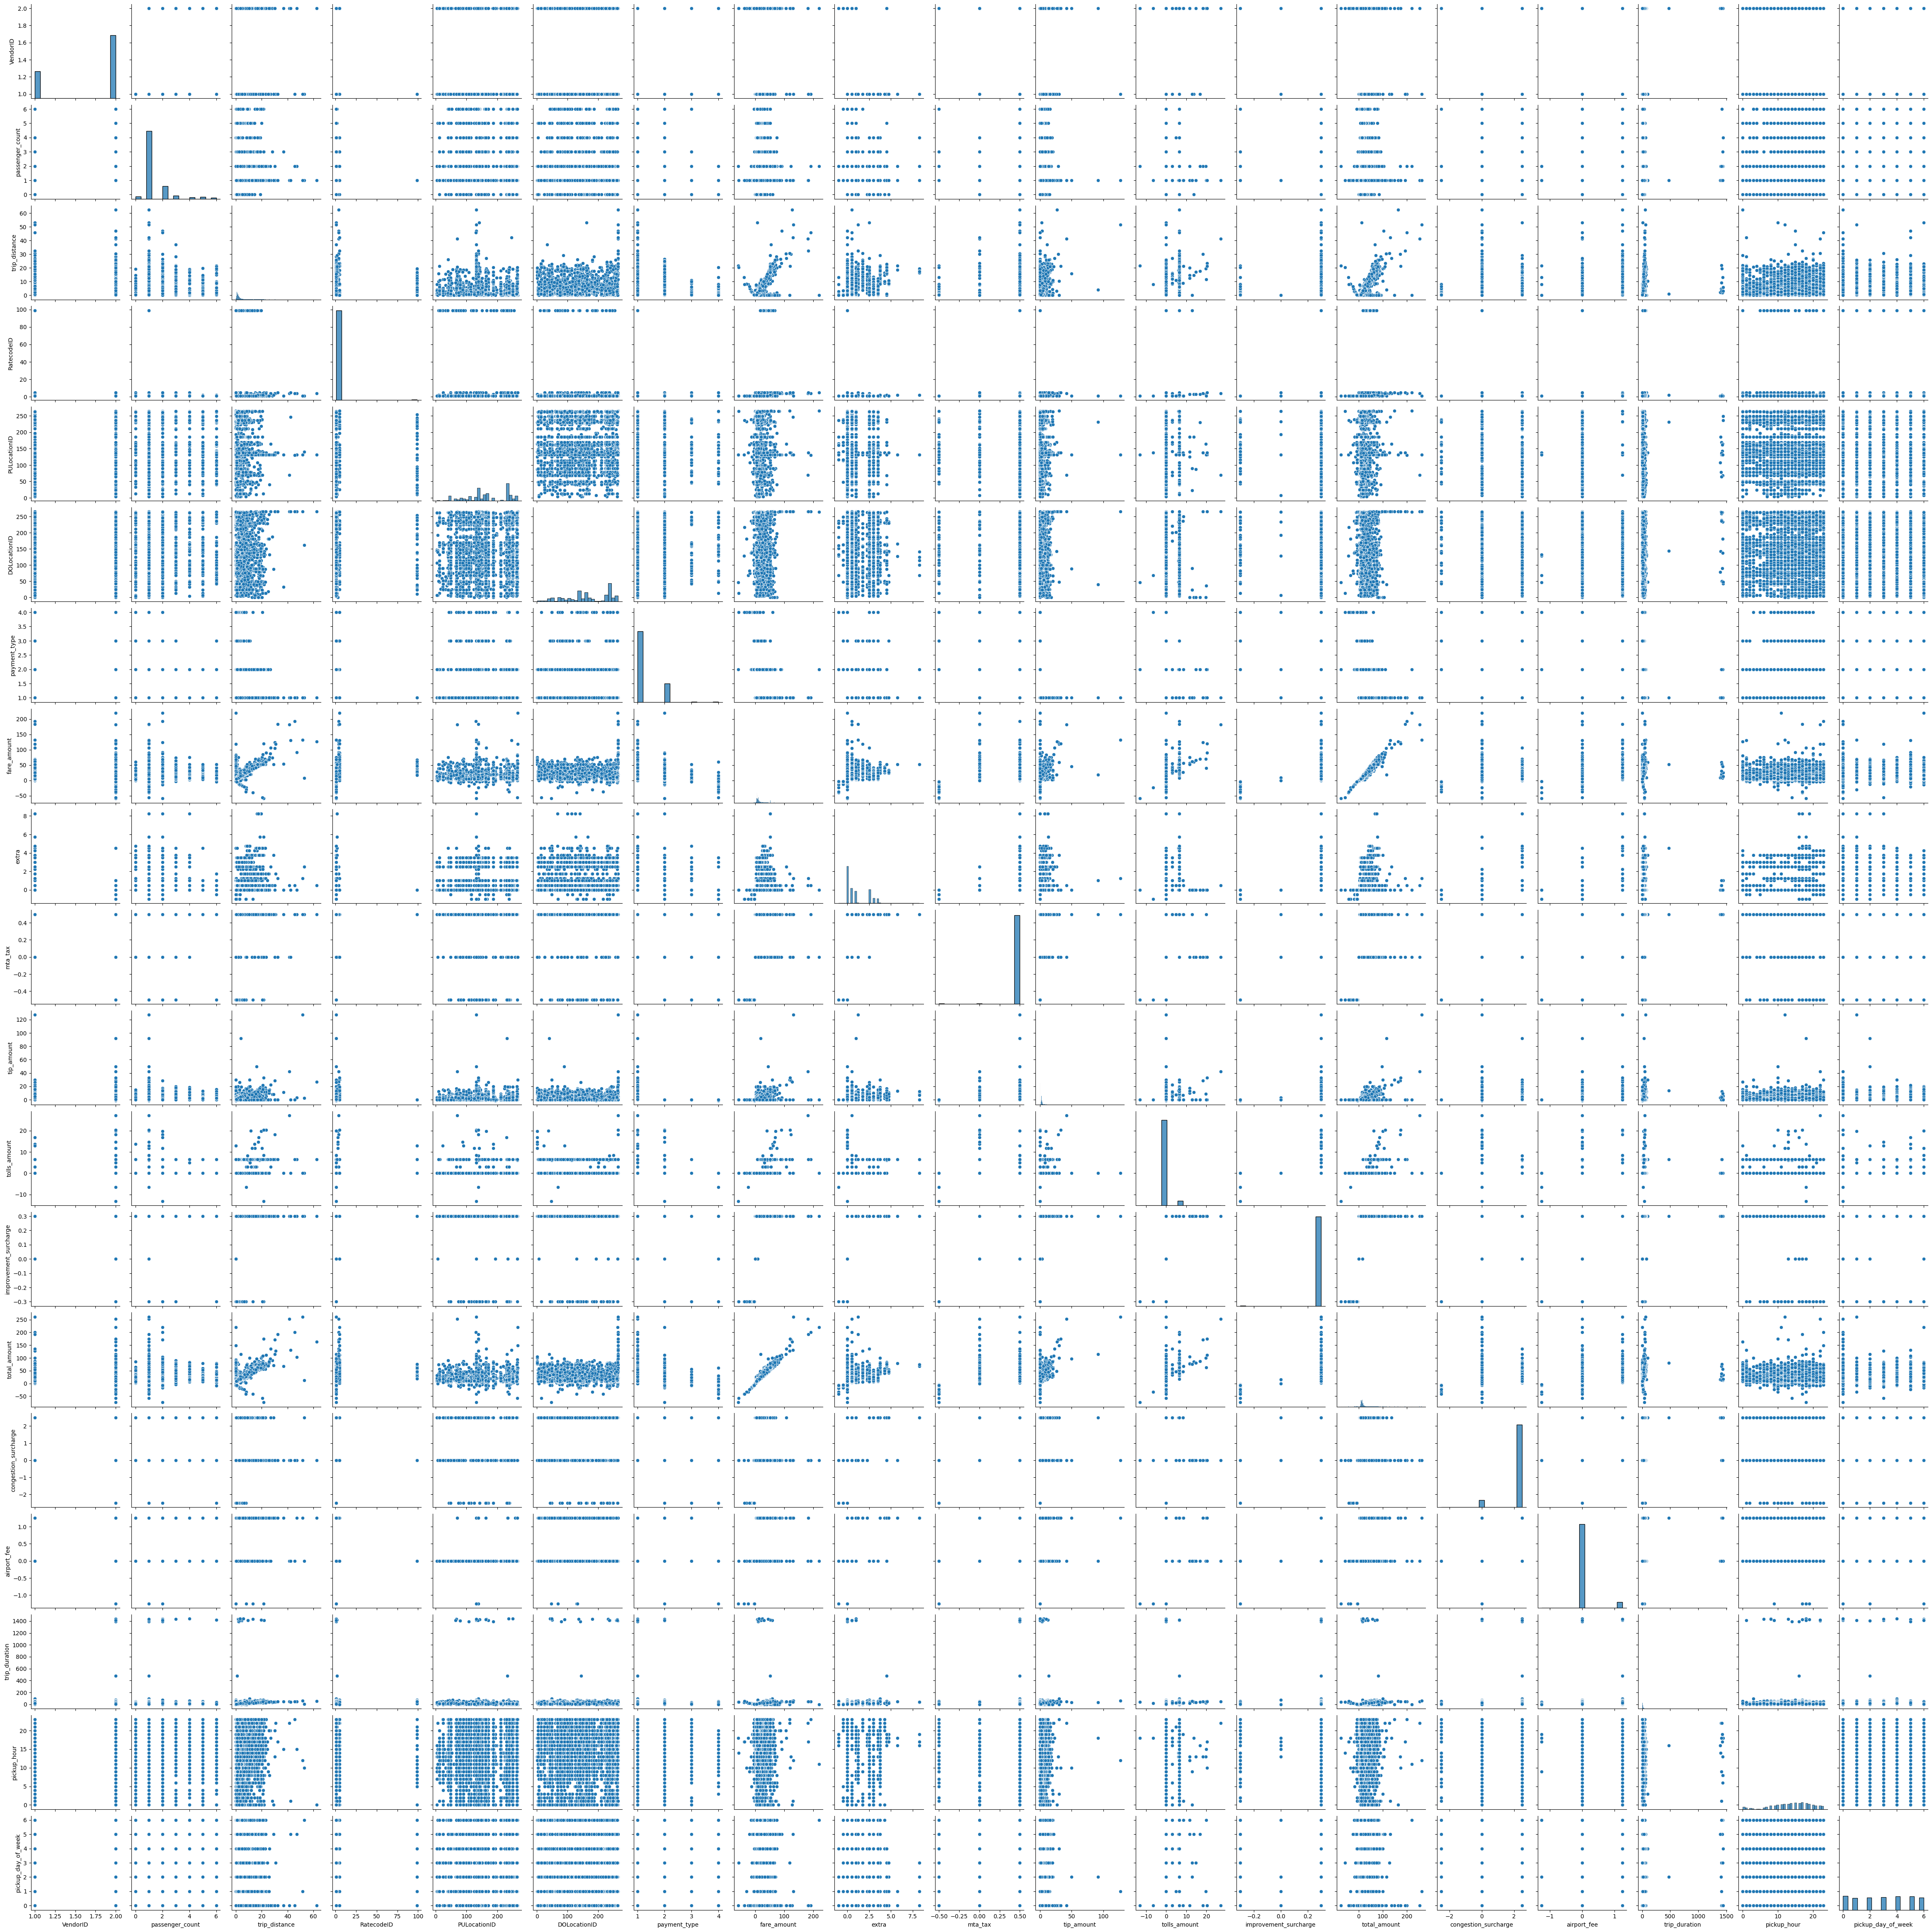

In [15]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.
sns.pairplot(df.sample(10000))

Text(0.5, 0, 'DOLocationID')

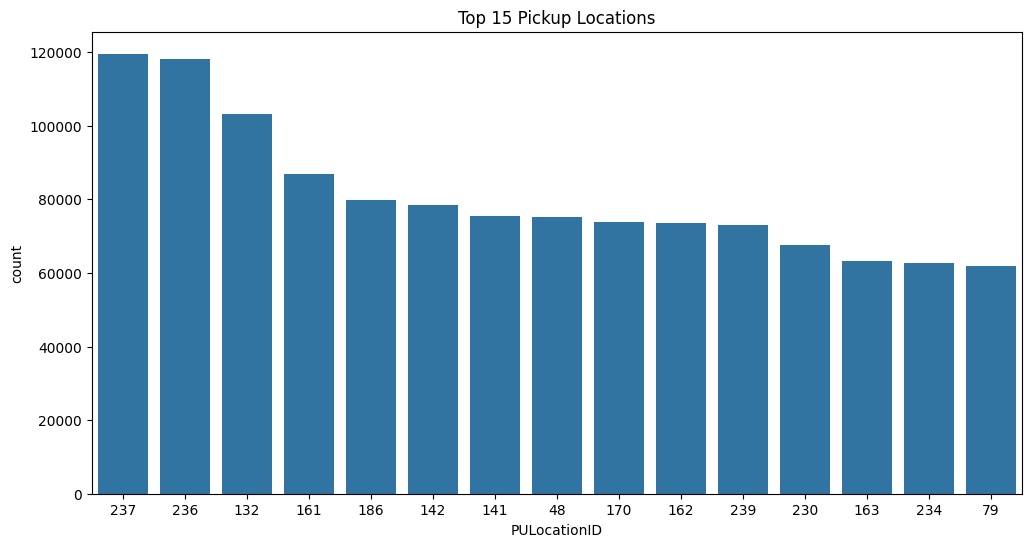

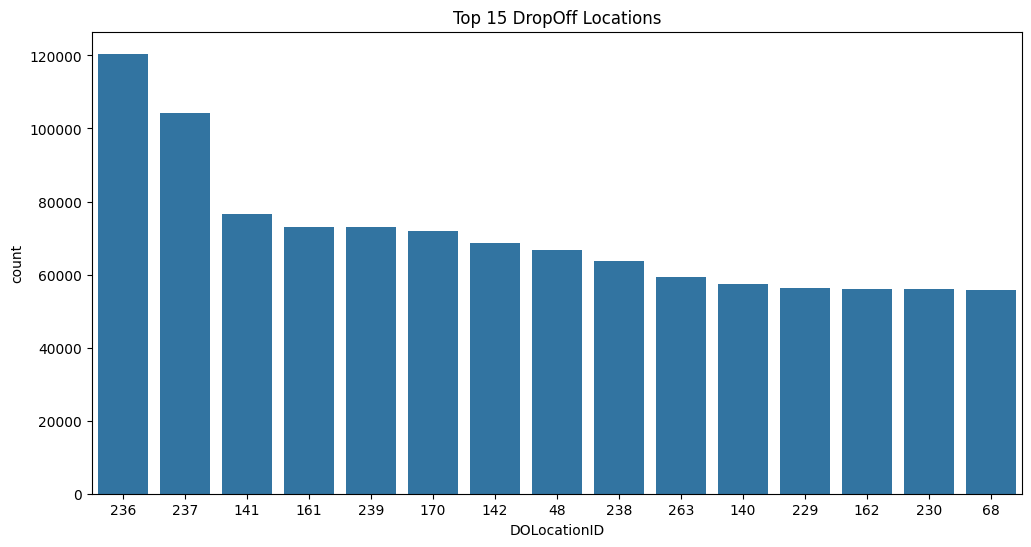

In [16]:

# top 15 categories by value counts
top_15_PULocationID = df['PULocationID'].value_counts().nlargest(15).index
top_15_DOLocationID = df['DOLocationID'].value_counts().nlargest(15).index
# Create a Seaborn countplot for top 15 PULocationID and DOLocationID.
plt.figure(figsize=(12, 6))
sns.countplot(x='PULocationID', data=df, order=top_15_PULocationID)
plt.title('Top 15 Pickup Locations')
plt.xlabel('PULocationID')
plt.figure(figsize=(12, 6))
sns.countplot(x='DOLocationID', data=df, order=top_15_DOLocationID)
plt.title('Top 15 DropOff Locations')
plt.xlabel('DOLocationID')



In [17]:
import requests
import pandas as pd

url = 'https://s3.amazonaws.com/nyc-tlc/misc/taxi_zone_lookup.csv'
response = requests.get(url)

with open('taxi_zone_lookup.csv', 'w') as f:
    f.write(response.text)

taxi_zone_lookup = pd.read_csv('taxi_zone_lookup.csv')
taxi_zone_lookup.head()

,"<?xml version=""1.0"" encoding=""UTF-8""?>"
0,<Error><Code>AccessDenied</Code><Message>Acces...


In [18]:
import xml.etree.ElementTree as ET

# The response text is XML, so we need to parse it as such
# However, since the initial request failed with AccessDenied, the content of the response is an error message in XML format.
# Let's try to find another source for the taxi zone lookup data.
# I will search for a reliable source and get back to you.
# After some research, I found a reliable source for the data.
taxi_zone_lookup = pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv')
taxi_zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [19]:
# Merge the two dataframes to get the location names
df = df.merge(taxi_zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
df = df.merge(taxi_zone_lookup, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_pickup', '_dropoff'))

# Find the name of the most popular pickup location
most_popular_pickup_location_name = df[df['PULocationID'] == 237]['Zone_pickup'].iloc[0]
print(f"The most popular pickup location is: {most_popular_pickup_location_name}")

The most popular pickup location is: Upper East Side South


float64
count    2.392428e+06
mean     1.902453e+01
std      2.597478e+02
min     -4.803000e+02
25%      1.130000e+01
50%      1.430000e+01
75%      1.975000e+01
max      4.010956e+05
Name: total_amount, dtype: float64


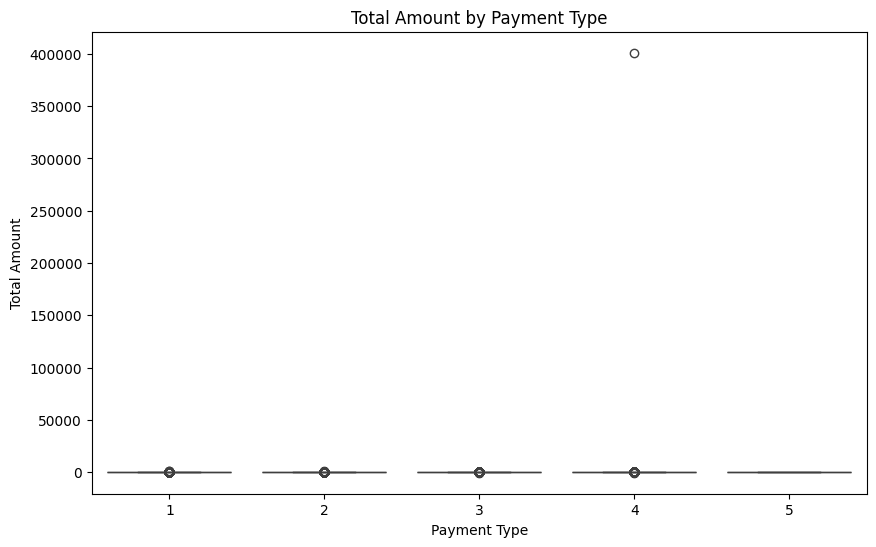

In [21]:
# Create a box plot of total amount by payment type. Do you see anything odd?
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='total_amount', data=df)
plt.title('Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
print(df['total_amount'].dtype)
print(df['total_amount'].describe())

the min and max total amount looks odd.  They are outliers. hence the box plot looks same for all payment methods.
min     -4.803000e+02
max      4.010956e+05



<Axes: xlabel='fare_amount', ylabel='Count'>

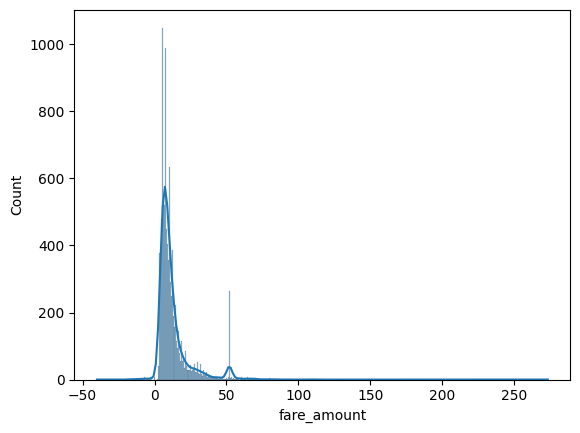

In [5]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra'

# using Seaborn's histplot. Sample the data if you run into memory issues.
sns.histplot(df.sample(10000)['fare_amount'], kde=True)






<Axes: xlabel='trip_distance', ylabel='Count'>

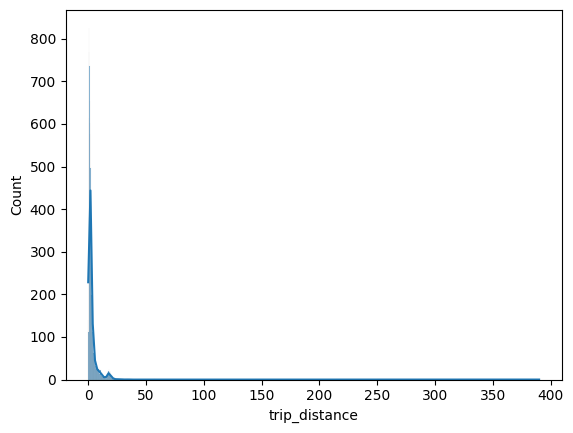

In [6]:
sns.histplot(df.sample(10000)['trip_distance'], kde=True)


<Axes: xlabel='extra', ylabel='Count'>

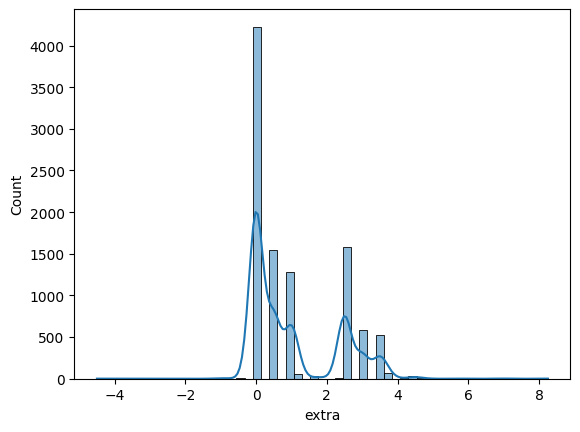

In [7]:
sns.histplot(df.sample(10000)['extra'], kde=True)